'\ndensity0[k,i]=mode_A*np.sin(k*2*np.pi/200)\ndensity0[k,i]=mode_A*np.sin(k*2*np.pi/200)*np.sin(i*2*np.pi/800)\ndensity0[k,i]=mode_A*np.sin(k*2*np.pi/200)*np.sin(i*2*np.pi/400)\ndensity0[k,i]+=mode_A*np.sin(k*2*np.pi/200)*np.sin(i*2*np.pi/400)\ndensity0[k,i]+=mode_A*abs(np.sin(k*2*np.pi/200)*np.sin(i*2*np.pi/400))\ndensity0[k,i]+=mode_A*(np.sin(k*2*np.pi/200)*np.sin(i*2*np.pi/400))**2\n'

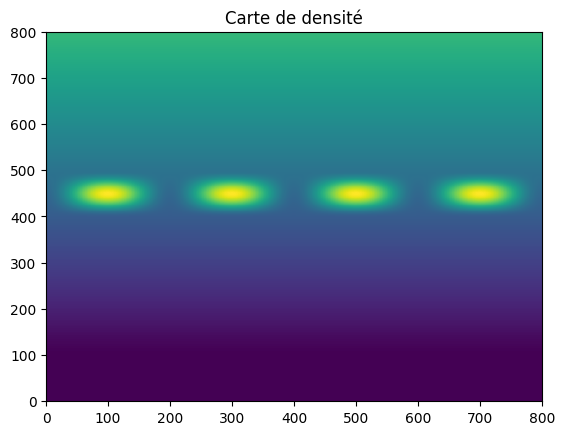

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import h5py as h5


n_max=6e19               #maximum density for a linear profile
NX=800                   #grid size
NY=800
Xpml=100
mode_A=6e19 #mode amplitude of the density
profile_type = 1
sim_t=20     #pas de temps
pas=10        #pas de déplacement
size=800

density0=np.zeros((NX,NY))


pos_0=NX-Xpml #6 wavelengths of 0 density
for i in range(NY):
    density0[0:pos_0,i]=np.linspace(n_max,0,pos_0)
    for j in range(pos_0-10,pos_0+10):
        density0[j-1,i]=n_max*(j-pos_0-10)**2/(pos_0)/40
    for k in range(300,400):
        density0[k,i]+=mode_A*(np.sin(k*2*np.pi/200)*np.sin(i*2*np.pi/400))**2

plt.pcolor(density0)            
            

        #smooth density

x_fac=np.linspace(0,NX-1,NX)
y_fac=1+np.tanh((x_fac-10-Xpml)/(60)) #3 wavelengths of 0 smooth density -200, /60
ne=np.flipud(density0)
ne1=ne.T*y_fac
density0=ne1.T
plt.title('Carte de densité')
plt.pcolor(density0)
plt.savefig('test07')



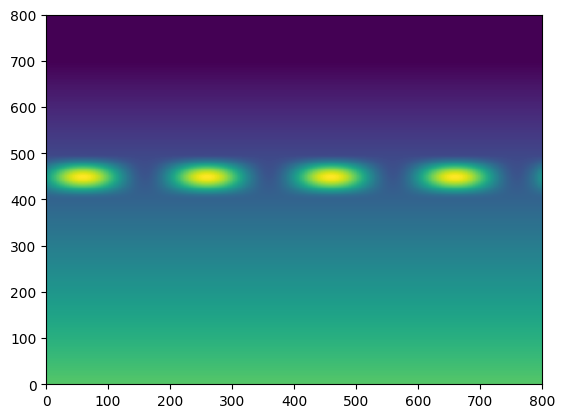

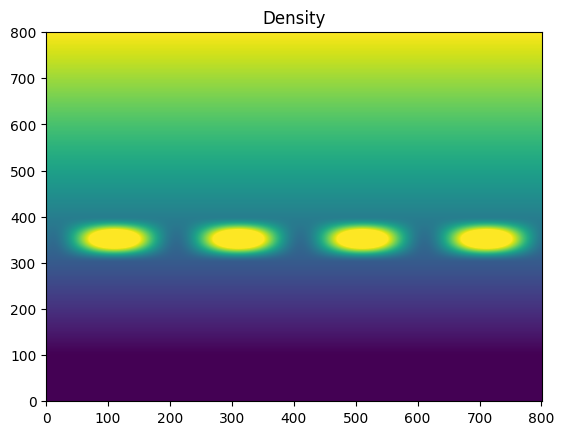

MovieWriter ffmpeg unavailable; using Pillow instead.


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import h5py as h5


n_max=6e19               #maximum density for a linear profile
NX=800                   #grid size
NY=800
Xpml=100
mode_A=6e19 #mode amplitude of the density
profile_type = 1
sim_t=20     #pas de temps
pas=10        #pas de déplacement
size=800
tilt=20/45
pos_shear=350#position of the shear center
shear_half_width=50

density0=np.zeros((NX,NY))

angle = tilt * np.pi / 180
pos_0=NX-Xpml #6 wavelengths of 0 density
for i in range(NY):
    density0[0:pos_0,i]=np.linspace(n_max,0,pos_0)
    for j in range(pos_0-10,pos_0+10):
        density0[j-1,i]=n_max*(j-pos_0-10)**2/(pos_0)/40
    for k in range(400,500):
        density0[k,i]+=mode_A*(np.sin(k*2*np.pi/200)*np.sin(i*2*np.pi/400))**2
        
for j in range(400,500):
    density0[j,:]=np.roll(density0[j,:],0*(j-300))        
        
        
'''        
for h in range(4):        
    for i in range(200*h,200*(h+1)):        
        for k in range(300,400):
            rotated_i = (i-200*h) * np.cos(angle) - k * np.sin(angle)
            rotated_k = (i-200*h) * np.sin(angle) + k * np.cos(angle)
            density0[k, i] += mode_A * (np.sin(rotated_k*2*np.pi/200) * np.sin(rotated_i*2*np.pi/400))**2
        
'''
#for i in range(2*shear_half_width-1):
    #for k in range(NX):
        #density0[i+pos_shear-shear_half_width,k]= density0[i+pos_shear-shear_half_width,k]+mode_A*(np.sin(2*np.pi*(i)/400)*np.cos(2*np.pi*(k+2*tilt*abs(i-shear_half_width)/2+1)/200))**2
#Pour un angle < 45°    
#for j in range(300,400):
    #density0[j,:]=np.roll(density0[j,:],(j-300))
#density0[k,i]+=mode_A*(np.sin(2*np.pi*(k+2*tilt*abs(i)/2/200)+1)*np.sin(i*2*np.pi/400))**2    
    
    

#plt.pcolor(density0)    
#plt.savefig('map45°')
        
'''               
            
x_fac=np.linspace(0,NX-1,NX)
y_fac=1+np.tanh((x_fac-10-Xpml)/(60)) #3 wavelengths of 0 smooth density -200, /60
ne=np.flipud(density0)
ne1=ne.T*y_fac
density0=ne1.T
plt.title('Carte de densité')
plt.pcolor(density0)
#plt.savefig('test') 
'''  

NE=density0
    
D=np.zeros([size,size,sim_t])
D[:,:,0]=NE
reste=[]
for t in range(sim_t):
    for j in range(NX):
        density0[j,:]=np.roll(density0[j,:],10)
    D[:,:,t]=density0

plt.pcolor(D[:,:,15])
     

#animation gif

fig, ax = plt.subplots()
image=D[:,:,0]
cax = ax.imshow(image, vmin=0, vmax=6e19, extent=[0, NX+1, 0, NY+1], aspect='auto')
ax.set_title('Density')

   
def animate(i):
     cax.set_array(D[:,:,i])

anim = animation.FuncAnimation(fig, animate, interval=30, frames=sim_t)

plt.show()

anim.save('Turbulence_map0.gif')
hf = h5.File('Turbulence_map0.h5', 'w')
hf.create_dataset('ne_map', data=D)
hf.close()


In [8]:
A = [1,2,3,4]
b=np.roll(A,1)
print(b)

[4 1 2 3]


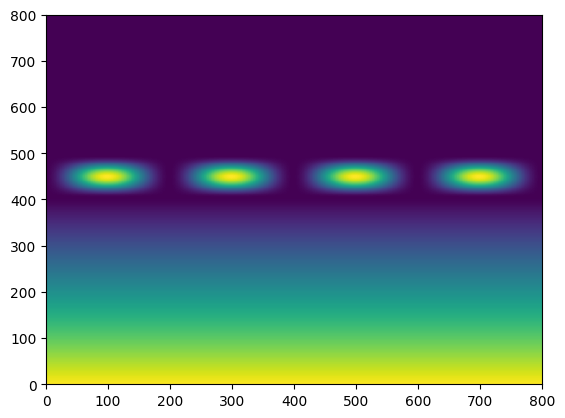

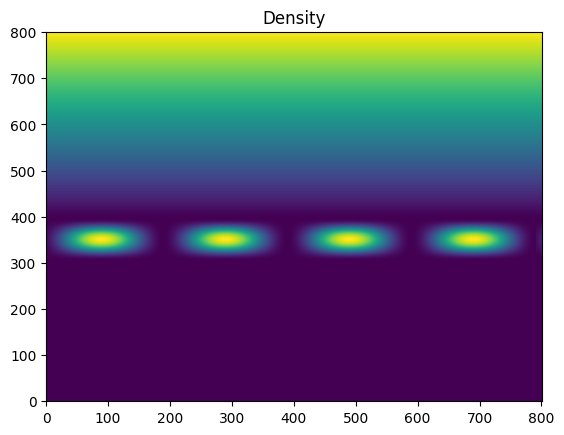

MovieWriter ffmpeg unavailable; using Pillow instead.


In [9]:
#Méthode lente mais qui fonctionne


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
import math
import h5py as h5
import random 
import matplotlib.cm as cm


#simulation parameters  
sizeX=800#grid size
sizeY=800
size =800
sim_t=20#time points
back_flow=0.0 #additional background flow in y direction otherwise everything moves 1 point per time point
dt=0.01 
pas=10
#physical parameters
diffusion=0.00001/sizeX/sizeY
visc=0 #plus on l'augmente, moins il y a de viscosité
dv_max=0.0#velocity fluctuation
dv_shear=0.16 #max velcoity of the parabolic sheared flow
fluc=0 #random small fluctuations yes or no 1 or 0
n_max=1e19 #density max of the linear profile
mode_A=1e19 #mode amplitude of the density
#geometry
T=int((sizeX)/2) #mode period size/2 gives 4 periods of the mode in y direction
shift_pol=1 #to shift mode in the y direction
pos_0=sizeY//2#position of the 0 density of the linear profile 
pos_shear=450#sizeY//2#position of the shear center
shear_half_width=45*sizeY//800
L=4*shear_half_width # modes have two rows within the sheared flow 
tilt=0#tilt 0 or 1 for 45 degrees tilt
NE=np.zeros([sizeY,sizeX]) 




#création carte de densité

for jj in range(sizeX):
    NE[0:pos_0,jj]=np.linspace(n_max,0,pos_0)
    for jjj in range(pos_0-10,pos_0+10):
           NE[jjj-1,jj]=n_max*(jjj-pos_0-10)**2/(pos_0)/40 

#perturbations

for ii in range(2*shear_half_width-1):
    for jj in range(sizeX):
        NE[ii+pos_shear-shear_half_width,jj]= NE[ii+pos_shear-shear_half_width,jj]+mode_A*(math.sin(2*math.pi*(ii)/L+fluc*random.random())*math.sin(2*math.pi*(jj+2*tilt*abs(ii-shear_half_width)/2+shift_pol)/T+fluc*random.random()))**2
plt.pcolor(NE)

#print(NE[:,0]-NE[:,size-1])


D=np.zeros([size,size,sim_t])
D[:,:,0]=NE
reste=[]
for t in range(sim_t):
    for p in range(10):
        reste.append(NE[:,p])
    
    for j in range(0,size-10):
        NE[:,j] = NE[:,j+10]
    for q in range(10):   
        NE[:,size-q-1] = reste[10-q-1]
    D[:,:,t]=NE   


 
        #smooth density

  
     

#animation gif

fig, ax = plt.subplots()
image=D[:,:,0]
cax = ax.imshow(image, vmin=0, vmax=1e19, extent=[0, sizeX+1, 0, sizeY+1], aspect='auto')
ax.set_title('Density')

   
def animate(i):
     cax.set_array(D[:,:,i])

anim = animation.FuncAnimation(fig, animate, interval=30, frames=sim_t)

plt.show()

anim.save('Turbulence_map.gif')
hf = h5.File('Turbulence_map.h5', 'w')
hf.create_dataset('ne_map', data=D)
hf.close()


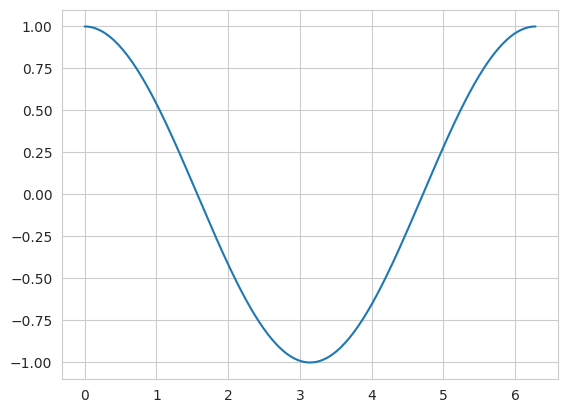

In [49]:
x=np.linspace(0,2*np.pi,200)
y=[]
for k in range(200):
    y.append(np.cos(x[k]))
    
plt.plot(x,y)
plt.show()

density0[k,i]+=mode_A*(np.sin(k*2*np.pi/200)*np.sin(i*2*np.pi/400))**2

density0[k,i]=mode_A*np.sin(k)
density0[k,i]=mode_A*np.sin(k*2*np.pi/200)
density0[k,i]=mode_A*np.sin(k*2*np.pi/200)*np.sin(i*2*np.pi/800)
density0[k,i]=mode_A*np.sin(k*2*np.pi/200)*np.sin(i*2*np.pi/400)
density0[k,i]+=mode_A*np.sin(k*2*np.pi/200)*np.sin(i*2*np.pi/400)
density0[k,i]+=mode_A*abs(np.sin(k*2*np.pi/200)*np.sin(i*2*np.pi/400))
density0[k,i]+=mode_A*(np.sin(k*2*np.pi/200)*np.sin(i*2*np.pi/400))**2